# 데이터 시각화 기초

__참고:__ 여기서 사용하는 코드는 조엘 그루스(Joel Grus)의 [밑다닥부터 시작하는 데이터 과학](https://blog.insightbook.co.kr/2020/02/28/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EA%B3%BC%ED%95%99-%EB%B6%84%EC%95%BC%EC%9D%98-%EA%B8%B0%EC%B4%88%EB%B6%80%ED%84%B0-%EC%95%8C%EA%B2%8C-%ED%95%B4%EC%A3%BC%EB%8A%94-%EA%B0%95%EB%A0%A5%ED%95%98%EA%B3%A0/)의 
3장에 사용된 [소스코드](https://github.com/joelgrus/data-science-from-scratch)의 일부를 기반으로 작성되었다.

데이터를 탐색하거나 데이터로 부터 얻은 정보를 전달할 때, 시각화를 이용하면 매우 효율적이다.
파이썬을 이용하여 아래 네 가지 시각화 기술을 설명한다.

* 막대 그래프
* 히스토그램
* 선 그래프
* 산점도

## 막대 그래프

막대 그래프는 범주별로 도수, 횟수, 퍼센트 등의 크기만큼 막대를 그리는 그래프이다.
범주별 미세한 차이를 명확하게 전달할 수 있는 그래프이다.

### 막대 그래프 예제

영화별 아카데미 수상 횟수가 다음과 같다.

<p>
<table cellspacing="20">
<tr>
    <td>영화 제목</td>
    <td>Annie Hall</td>
    <td>Ben-Hur</td>
    <td>Casablanca</td>
    <td>Gandhi</td>
    <td>West Side Story</td>
</tr>
<tr>
    <td>수상 횟수</td>
    <td>5</td>
    <td>11</td>
    <td>3</td>
    <td>8</td>
    <td>10</td>
</tr>
</table>
</p>

위 표를 막대 그래프로 그리면 다음과 같다.

* x 축: 범주(영화 제목)
* y 축: 도수(수상 횟수)

In [1]:
from matplotlib import pyplot as plt

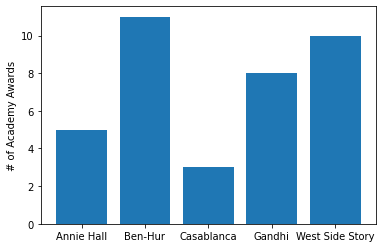

In [2]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

plt.bar(range(len(movies)), num_oscars)  # x축 레이블 = [0, 1, 2, 3, 4]
plt.ylabel("# of Academy Awards")        # y축 레이블
plt.xticks(range(len(movies)), movies)   # x축 레이블 = movies 로 변경

plt.show()

### 막대 그래프 유의사항

축을 지정할 때 조심하지 않으면 오해를 불러일으킬 수 있다.

다음 예제는 2017년과 2018년 사람들이 데이터 과학에 대해 언급하는 것을 경험한 횟수를 표로 담고 있다.

<table>
<tr>
    <td>연도</td>
    <td>2017</td>
    <td>2018</td>
</tr>
<tr>
    <td>횟수</td>
    <td>500</td>
    <td>505</td>
</tr>
</table>

#### y축의 시작을 499로 잡는 경우

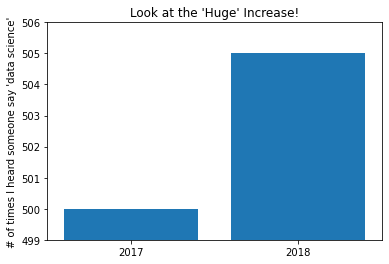

In [3]:
mentions = [500, 505]
years = [2017, 2018]

plt.bar(years, mentions, 0.8)
plt.xticks(years)             # x축 레이블 표시에 필수적임
plt.ylabel("# of times I heard someone say 'data science'")

plt.ticklabel_format(useOffset=False)

# y축의 시작점을 499로 잡으면 오해를 불러일으킬 수 있음.
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.show()

#### y축의 시작을 0으로 잡는 경우

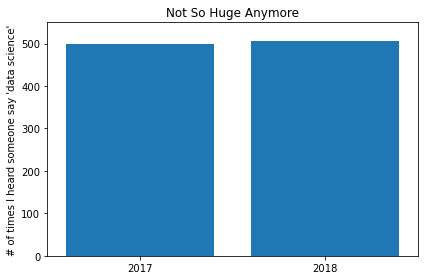

In [4]:
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
plt.ticklabel_format(useOffset=False)

# y축의 시작점을 0으로 잡으면 상황이 달라짐.
plt.axis([2016.5, 2018.5, 0, 550])
plt.title("Not So Huge Anymore")

plt.tight_layout()

plt.show()

## 히스토그램

히스토그램은 막대 그래프의 한 종류이며,
양적 데이터를 범주로 사용할 때 유용하다.
예를 들어, 무게, 길이, 시간, 점수 등 
숫자의 범위에 따라 나뉘어진 데이터를 막대 그래프로 보여줄 때 사용한다.

양적 데이터들의 연속성을 반영하기 위해 막대 그래프들 사이의 간극이 없도록 그린다.
따라서 정해진 구간에 해당되는 항목의 개수나 빈도수를 보여주어 값의 분포를 쉽게 관찰할 수 있게 해준다.

### 히스토그램 예제

학생들의 점수가 다음과 같다.

    83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0

점수를 십분위수(10점 단위로 구분)로 구분하면 아래 표를 얻는다. 

<p>
<table cellspacing="20">
<tr>
    <td>점수 구간(십분위수)</td>
    <td>0-9</td>
    <td>10-19</td>
    <td>20-29</td>
    <td>30-39</td>
    <td>40-49</td>
    <td>50-59</td>
    <td>60-69</td>
    <td>70-79</td>
    <td>80-89</td>
    <td>90-100</td>
</tr>
<tr>
    <td>학생 수</td>
    <td>2</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>3</td>
    <td>4</td>
    <td>3</td>
</tr>
</table>
</p>

위 데이터를 히스토그램으로 나타내면 다음과 같다.

* x 축: 점수 구간
* y 축: 학생 수

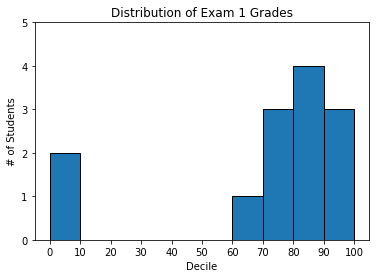

In [5]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]

histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)

plt.bar([x + 5 for x in histogram.keys()],  
        histogram.values(),                 
        10,                                 
        edgecolor=(0, 0, 0))                

plt.axis([-5, 105, 0, 5])                  
                                           

plt.xticks([10 * i for i in range(11)])    
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

## 선 그래프

선 그래프는 막대 그래프의 상단 중심부를 선분으로 연결하여 범주별 변화를 비교하는 그래프이다. 
시계열 데이터에 대한 정보를 전달할 때 유용하다.

### 선 그래프 예제

1950년 부터 10년 주기로 미국 국내총생산(GDP)를 정리한 표가 다음과 같다. 
단위는 10억달러이다. 

<p>
<table cellspacing="20">
<tr>
    <td>연도</td>
    <td>1950</td>
    <td>1960</td>
    <td>1970</td>
    <td>1980</td>
    <td>1990</td>
    <td>2000</td>
    <td>2010</td>
</tr>
<tr>
    <td>GDP</td>
    <td>300.2</td>
    <td>543.3</td>
    <td>1075.9</td>
    <td>2862.5</td>
    <td>5979.6</td>
    <td>10289.7</td>
    <td>14958.3</td>
</tr>
</table>
</p>

위 데이터를 선 그래프로 나타내면 다음과 같다.

* x 축: 연도
* y 축: GDP

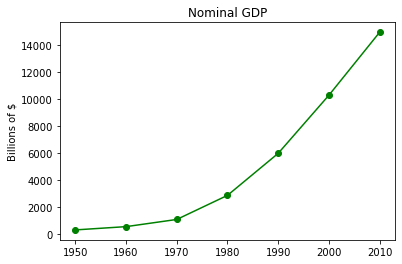

In [6]:
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

plt.title("Nominal GDP")
plt.ylabel("Billions of $")
plt.show()

## 산점도

산점도는 두 변수 간의 연관 관계를 2차원 평면 상에서 점으로 찍어 보여 주는 그래프이다. 

### 산점도 예제

어떤 웹사이트 회원의 친구 수와 하룻동안의 사이트 이용시간 사이의 연관 관계를 담은 표가 다음과 같다.

<p>
<table cellspacing="20">
<tr>
    <td>친구 수</td>
    <td>70</td>
    <td>65</td>
    <td>72</td>
    <td>63</td>
    <td>71</td>
    <td>64</td>
    <td>60</td>
    <td>64</td>
    <td>67</td>
</tr>
<tr>
    <td>이용 시간</td>
    <td>175</td>
    <td>170</td>
    <td>205</td>
    <td>120</td>
    <td>220</td>
    <td>130</td>
    <td>105</td>
    <td>145</td>
    <td>190</td>
</tr>
<tr>
    <td>사용자 라벨</td>
    <td>a</td>
    <td>b</td>
    <td>c</td>
    <td>d</td>
    <td>e</td>
    <td>f</td>
    <td>g</td>
    <td>h</td>
    <td>i</td>
</tr>
</table>
</p>

위 데이터를 선 그래프로 나타내면 다음과 같다.

* x 축: 친구 수
* y 축: 이용 시간

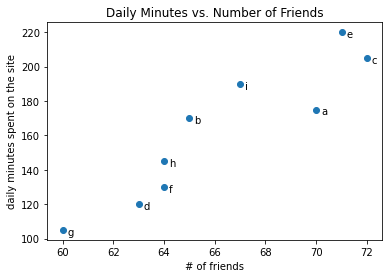

In [7]:
friends = [ 70,  65,  72,  63,  71,  64,  60,  64,  67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels =  ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
        xy=(friend_count, minute_count), 
        xytext=(5, -5),                  
        textcoords='offset points')

plt.title("Daily Minutes vs. Number of Friends")
plt.xlabel("# of friends")
plt.ylabel("daily minutes spent on the site")
plt.show()

### 산점도 유의사항

막대 그래프의 경우처럼 축을 지정할 때 조심하지 않으면 오해를 불러일으킬 수 있다.

예를 들어, 아래 표는 다섯 명의 1차, 2차 테스트 점수를 보여준다. 

<p>
<table cellspacing="20">
<tr>
    <td>1차 테스트</td>
    <td>99</td>
    <td>90</td>
    <td>85</td>
    <td>97</td>
    <td>80</td>
</tr>
<tr>
    <td>2차 테스트</td>
    <td>100</td>
    <td>85</td>
    <td>60</td>
    <td>90</td>
    <td>70</td>
</tr>
</table>
</p>

#### 축 지정

* x 축: 1차 테스트 점수
* y 축: 2차 테스트 점수

#### 양 축의 척도(scale)가 다른 경우

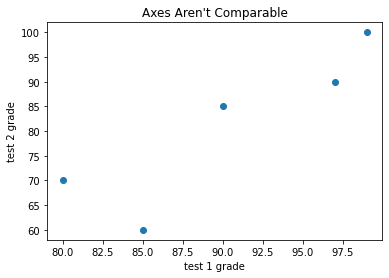

In [8]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Aren't Comparable")
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

결론: 1차 테스트, 2차 테스트 점수가 별 변동이 없는 것으로 보인다.

#### 양 축의 척도가 동일한 경우

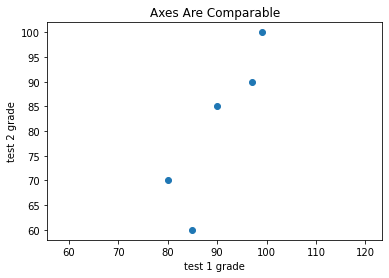

In [9]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]
plt.scatter(test_1_grades, test_2_grades)
plt.title("Axes Are Comparable")
plt.axis("equal")                  # 양 축의 비율을 동일하게 함
plt.xlabel("test 1 grade")
plt.ylabel("test 2 grade")
plt.show()

결론: 1차 테스트 점수가 높은 친구가 2차 테스트에서 보다 높은 점수를 얻었음을 알 수 있다.